Problem Statement

BC Finance is a company that deals in home loans. They have a presence over urban,semi-urban and rural areas.The customer is only allowed to apply for a loan sfter the company has validated the customers eligibility for a loan.

This processs is extremely time consuming, thus they have approached us to automate the loan eligibilty process based on the customer details provided form the application forms.The data made avaiable to us is gender ,marriage status,dependents, education, self employed,income,	coapplicant, Income,loanAmount,loan amount term,credit history and the area in which the property is situated.By using this data we will be creating a machine learning model to automate the loan approval process for BC Finance.
 



Hypothesis Statement

From the data provided we will only be using Income,Loan ammount, credit history and area as we hypothesise that these 4 data points will have the most significant impact on wheter a peron will be approved for a loan or not.It is predicted that reion will have a strong correlation with loan ammount and income.


In [1]:
#Supressign warnings and importing Libraries

import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)\

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import plotly.express as px
import seaborn as sns
import skimpy as sp

# Date manipulation
from datetime import date, datetime, timedelta
# Clustering algorithm
from sklearn.cluster import KMeans
# For Cat features
from category_encoders import OneHotEncoder
# For Scaling features
from sklearn.preprocessing import StandardScaler
# Model pipeline
from sklearn.pipeline import make_pipeline
# Reduce dimensionality
from sklearn.decomposition import PCA
# Handling missing values
from sklearn.impute import SimpleImputer
# Evaluation metric
from sklearn.metrics import silhouette_score

In [2]:
#Inspecting Data
df = pd.read_csv('./data/train.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
# checking missing values, data types, shape of the data
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
None


In [4]:
# check the dimension of the data
print(f'The data has {df.shape[0]} rows and {df.shape[1]} columns.')

The data has 614 rows and 13 columns.


In [5]:
#Checkingfor missing data in our csv file
missing_values = (
    df.isnull().sum()/len(df)*100
).round(0).astype(int)

print(f'Column\t\t\t% missing')
print(f'{"-"}'*35)
missing_values.round(2)

Column			% missing
-----------------------------------


Loan_ID              0
Gender               2
Married              0
Dependents           2
Education            0
Self_Employed        5
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           4
Loan_Amount_Term     2
Credit_History       8
Property_Area        0
Loan_Status          0
dtype: int32

In [6]:
#Handling missing values
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Cleaning the data

In [7]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [8]:
# removing missing values with rows
df.dropna(subset=['Gender'], inplace = True)

In [9]:
#Setting empty values of married to no
df['Married'].fillna('No', inplace = True)

In [10]:
# Empty = no (dependants)
df['Dependents'].fillna(0, inplace = True)

In [11]:
# Default empty to no (Self_Employed)
df['Self_Employed'].fillna('No', inplace = True)


In [12]:
# Replace the empty values with the mean (loan_anmount)
x = df["LoanAmount"].mean()
df["LoanAmount"].fillna(x, inplace = True)

In [13]:
# replace the empty values with the maximum loan term (loan_amount_term) 
x = df["Loan_Amount_Term"].max()
df["Loan_Amount_Term"].fillna(x, inplace = True)



In [14]:
# replace empty values with 0 (Credit_History)
df['Credit_History'].fillna(0, inplace = True)


In [15]:
#Dropping irrelavent colums (Gennder & Education & Loan_ID)
irrelevant_features = ['Gender', 'Education','Loan_ID']
df.drop(
    
    columns=irrelevant_features, 
    inplace=True
)

Dealing with duplicates

In [16]:
df.duplicated().sum()

1

Outliers

In [17]:
Credit_status = ['ApplicantIncome', 'LoanAmount']
Amount_df = df[Credit_status]
Amount_df


fig = px.box(
    data_frame=Amount_df, 
    x='ApplicantIncome', 
    orientation='h',
    title='Boxplot of the Target (ApplicantIncome) - With Outliers'
)

fig.update_layout(xaxis_title='Target')
fig.show()

In [18]:
Amount_df[Amount_df['ApplicantIncome'] < 30_000]

,ApplicantIncome,LoanAmount
0,5849,145.017271
1,4583,128.000000
2,3000,66.000000
3,2583,120.000000
4,6000,141.000000
...,...,...
609,2900,71.000000
610,4106,40.000000
611,8072,253.000000
612,7583,187.000000


In [19]:
mask_price = Amount_df['ApplicantIncome'] < 8_000

fig = px.box(
    data_frame=Amount_df[mask_price], 
    x='ApplicantIncome', 
    orientation='h',
    title='Boxplot of the Target (ApplicantIncome) - Without Outliers'
)

fig.update_layout(xaxis_title='Target')
fig.show()

Data Exploration

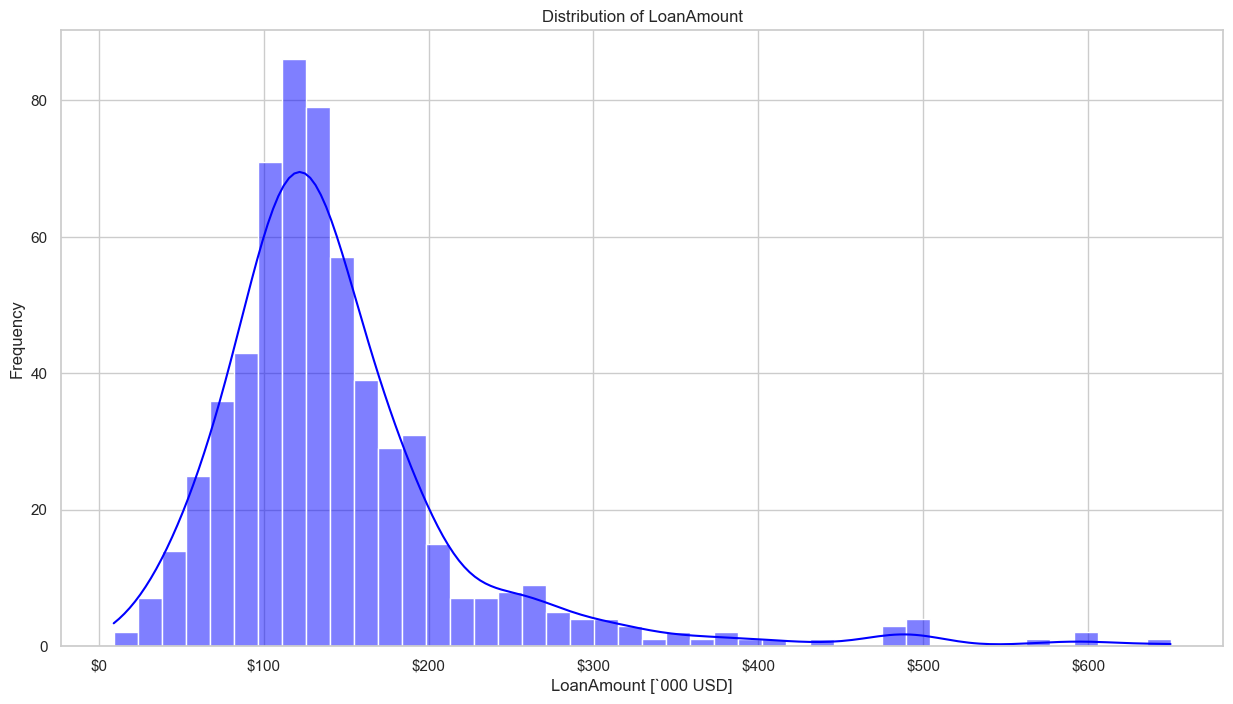

In [20]:
# Create a distribution plot using Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(15, 8))
sns.histplot(df["LoanAmount"], kde=True, color="blue")

# Adding labels and title
plt.xlabel("LoanAmount [`000 USD]")
plt.ylabel("Frequency")
plt.title("Distribution of LoanAmount")

# Format x-axis labels to display prices in "$100,000" format (BONUS)
def price_formatter(x, pos):
    return f"${int(x/1):}"

ax = plt.gca()
ax.xaxis.set_major_formatter(mticker.FuncFormatter(price_formatter))

plt.show()

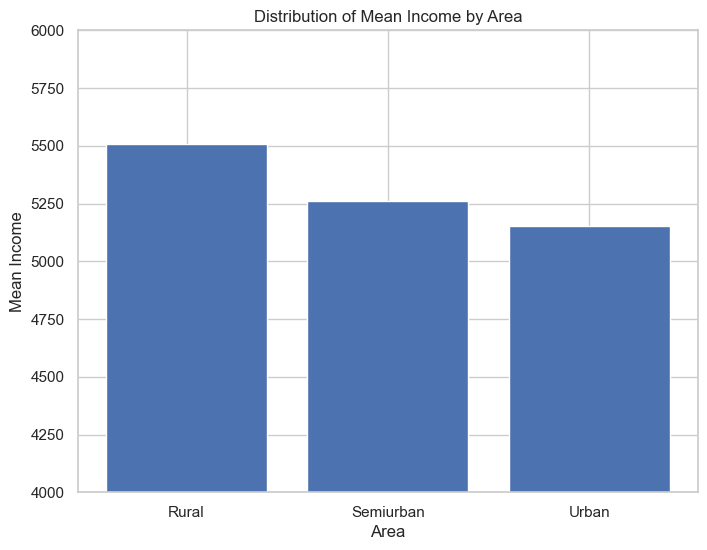

In [21]:
# Area data plotted with the mean income to see how the income is distrebuted across the dffrent areas 
area_income = df.groupby('Property_Area')['ApplicantIncome'].mean()
 
fig, ax1 = plt.subplots(figsize=(8, 6))
ax1.bar(area_income.index, area_income.values, label='Mean Income')
 
ax1.set_xlabel('Area')
ax1.set_ylabel('Mean Income')
plt.title('Distribution of Mean Income by Area')

ax1.set_ylim(4000,6000)
 
plt.show()

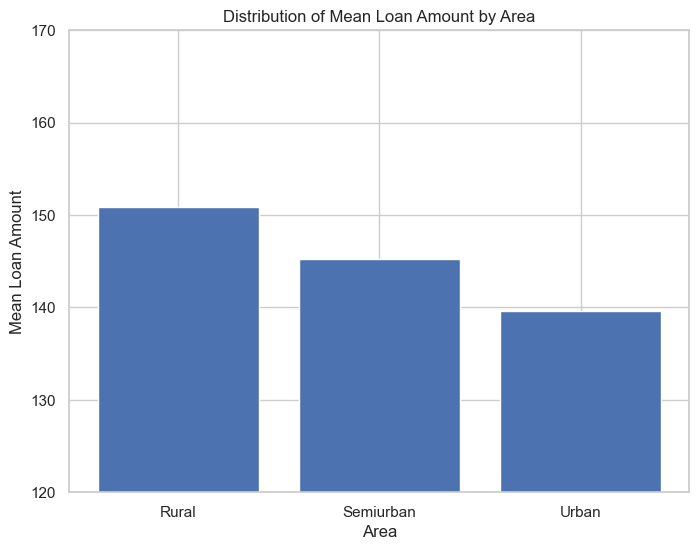

In [22]:
# Area data plotted with the mean loan amount to see how the losn smount is distrebuted across the dffrent areas #
area_income = df.groupby('Property_Area')['LoanAmount'].mean()
 
fig, ax1 = plt.subplots(figsize=(8, 6))
ax1.bar(area_income.index, area_income.values, label='Mean Loan Amount')
 
ax1.set_xlabel('Area')
ax1.set_ylabel('Mean Loan Amount')
plt.title('Distribution of Mean Loan Amount by Area')

ax1.set_ylim(120, 170)
 
plt.show()

In [23]:
# Instantiate the Imputer
imp = SimpleImputer(strategy='mean')

# Fit & transform data
imputed_df = pd.DataFrame(imp.fit_transform(df[['ApplicantIncome']]))

# Checking missing values again
imputed_df.isnull().sum()

0    0
dtype: int64

In [24]:
df['ApplicantIncome'].mean()

5296.818635607321

In [25]:
def prepare_data(data):

    data = (
        data
        .dropna()
        # Remove NA values
        # Remove unnecessary features 
        )
    prepared_df = OneHotEncoder(use_cat_names=True).fit_transform(data)
    
    # Output: cleaned dataframe
    return prepared_df

In [26]:
prepared_df = prepare_data(df)
prepared_df.head()

,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Dependents_0#,Self_Employed_No,Self_Employed_Yes,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area_Urban,Property_Area_Rural,Property_Area_Semiurban,Loan_Status_Y,Loan_Status_N
0,1,0,1,0,0,0,0,1,0,5849,0.0,145.017271,360.0,1.0,1,0,0,1,0
1,0,1,0,1,0,0,0,1,0,4583,1508.0,128.000000,360.0,1.0,0,1,0,0,1
2,0,1,1,0,0,0,0,0,1,3000,0.0,66.000000,360.0,1.0,1,0,0,1,0
3,0,1,1,0,0,0,0,1,0,2583,2358.0,120.000000,360.0,1.0,1,0,0,1,0
4,1,0,1,0,0,0,0,1,0,6000,0.0,141.000000,360.0,1.0,1,0,0,1,0


In [27]:
# Features to use
X = prepare_data(df)
X.head()

,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Dependents_0#,Self_Employed_No,Self_Employed_Yes,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area_Urban,Property_Area_Rural,Property_Area_Semiurban,Loan_Status_Y,Loan_Status_N
0,1,0,1,0,0,0,0,1,0,5849,0.0,145.017271,360.0,1.0,1,0,0,1,0
1,0,1,0,1,0,0,0,1,0,4583,1508.0,128.000000,360.0,1.0,0,1,0,0,1
2,0,1,1,0,0,0,0,0,1,3000,0.0,66.000000,360.0,1.0,1,0,0,1,0
3,0,1,1,0,0,0,0,1,0,2583,2358.0,120.000000,360.0,1.0,1,0,0,1,0
4,1,0,1,0,0,0,0,1,0,6000,0.0,141.000000,360.0,1.0,1,0,0,1,0


Building Model

In [28]:
# Build Model
model = make_pipeline(
        StandardScaler(), # clustering using distances - scaling is recommended

        KMeans(n_clusters=5, random_state=42)
    )

# Fit model - assign the label
X['Clusters'] = model.fit_predict(X)

In [29]:
X.head()

,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Dependents_0#,Self_Employed_No,Self_Employed_Yes,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area_Urban,Property_Area_Rural,Property_Area_Semiurban,Loan_Status_Y,Loan_Status_N,Clusters
0,1,0,1,0,0,0,0,1,0,5849,0.0,145.017271,360.0,1.0,1,0,0,1,0,2
1,0,1,0,1,0,0,0,1,0,4583,1508.0,128.000000,360.0,1.0,0,1,0,0,1,1
2,0,1,1,0,0,0,0,0,1,3000,0.0,66.000000,360.0,1.0,1,0,0,1,0,0
3,0,1,1,0,0,0,0,1,0,2583,2358.0,120.000000,360.0,1.0,1,0,0,1,0,3
4,1,0,1,0,0,0,0,1,0,6000,0.0,141.000000,360.0,1.0,1,0,0,1,0,2


In [30]:
 # Calculate inertia
model.named_steps["kmeans"].inertia_

8011.037661400367

In [31]:
# Calculate silhouette score
silhouette_score(X, model.named_steps["kmeans"].labels_)

-0.04975717481892213

In [32]:
n_clusters = range(2,8)
inertia_errors = []
silhouette_scores = []

# Add `for` loop to train model and calculate inertia, silhouette score.
for k in n_clusters:
    # Build model
    model = make_pipeline(
        StandardScaler(), # clustering using distances - scaling is recommended
        KMeans(n_clusters=k, random_state=42)
    )
    # Train model
    model.fit(X)
    # Calculate inertia
    inertia_errors.append(model.named_steps["kmeans"].inertia_)
    # Calculate silhouette score
    silhouette_scores.append(
        silhouette_score(
            X, 
            model.named_steps["kmeans"].labels_)
    )

print("Inertia:", inertia_errors[:3])
print()
print("Silhouette Scores:", silhouette_scores[:3])

Inertia: [10786.648997080065, 9361.08393336756, 8595.30330180716]

Silhouette Scores: [0.019433207174740178, 0.036468993720540556, -0.08809985780833485]


In [33]:
import plotly.express as px
# Create line plot of `inertia_errors` vs `n_clusters`
fig = px.line(
    x=n_clusters,
    y=inertia_errors,
    title="K-Means Model: Inertia vs Number of Clusters"
)
fig.update_layout(xaxis_title="Number of Clusters", yaxis_title="Inertia")
fig.show()

In [34]:
# Create a line plot of `silhouette_scores` vs `n_clusters`
fig = fig = px.line(
    x=n_clusters,
    y=silhouette_scores,
    title="K-Means Model: Silhouette Score vs Number of Clusters (Elbow Method)"
)
fig.update_layout(
    xaxis_title="Number of Clusters", yaxis_title="Silhouette Score"
)
fig.show()

In [35]:
# final_model labels
final_model = make_pipeline(
    StandardScaler(),
    KMeans(n_clusters=3, random_state=42)
)
# Predict class labels
labels = final_model.fit_predict(X)
print(labels[:10])

[2 1 0 2 2 0 2 1 2 1]


In [36]:
X['labels'] = labels
print(labels[:10])

[2 1 0 2 2 0 2 1 2 1]


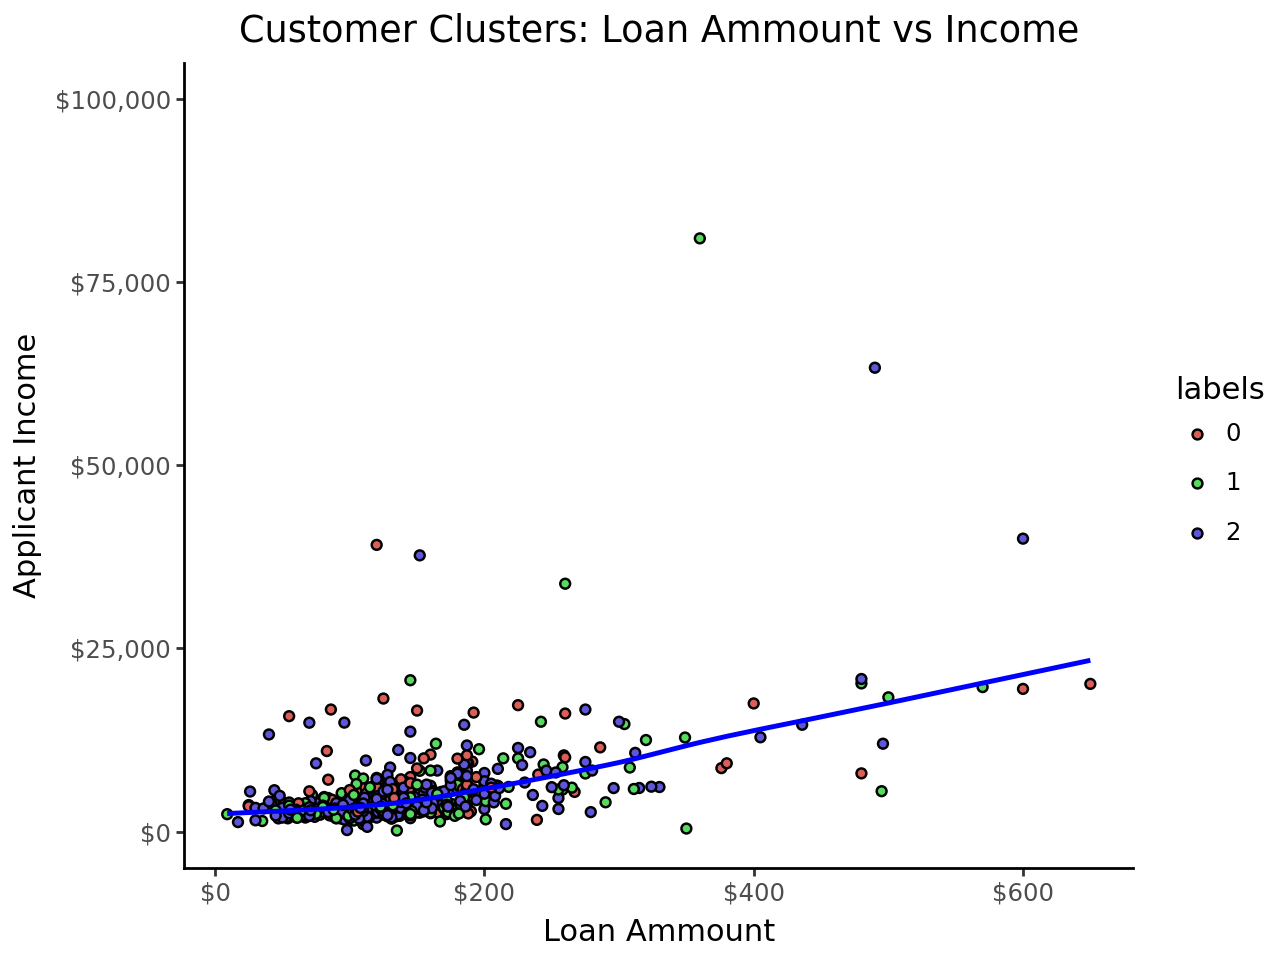

In [37]:
import plotnine as pn
from plotnine import *
p = (
    # Create a plot area
    ggplot(X, aes(x='LoanAmount	', y='ApplicantIncome')) +
    # Add points into the plot area
    geom_point(aes(fill = X['labels'].astype(str)))
    )
# Add a blue smooth line
p = p + geom_smooth(
    color = "blue",
    se = False
    )
# Format x-axis scale to display `$000,000`
p = p + scale_x_continuous(
    name='Loan Ammount',
    labels = lambda x: [f'${y:,.0f}' for y in x]
    )
# Format y-axis scale to display `$000,000`
p = p + scale_y_continuous(
    name='Applicant Income',
    labels = lambda x: [f'${x:,.0f}' for x in x],
    limits=(0,100_000)
    )
# Add title to the plot
p = p + labs(
    title = "Customer Clusters: Loan Ammount vs Income"
    ) + theme_classic() # Add plot theme

p.show()

In [38]:
# Instantiate transformer
pca = PCA(n_components=2, random_state=42)

# Transform `X`
X_t = pca.fit_transform(X)
X_t
# # Put `X_t` into DataFrame
X_pca = pd.DataFrame(X_t, columns=["PC1", "PC2"])

print("X_pca shape:", X_pca.shape)
X_pca.head()

X_pca shape: (601, 2)


,PC1,PC2
0,671.751077,-1578.926871
1,-703.248500,-169.618567
2,-2169.811902,-1791.802964
3,-2761.062009,528.927139
4,822.298073,-1567.708932


In [39]:
# Create scatter plot
fig = px.scatter(
    data_frame=X_pca,
    x="PC1",
    y="PC2",
    color=labels.astype(str),
    title="Customer Clusters: Spent vs Income"
)
fig.update_layout(xaxis_title="Loan Ammount", 
                  yaxis_title="Income")
fig.show()